In [5]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras import backend as k
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout, Layer, InputSpec
from keras.models import Sequential,Model
from keras import regularizers
from keras import initializers
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.utils import np_utils, conv_utils


from mlprecip_models import *
from mlprecip_utils import *
from mlprecip_xai import *

In [57]:
input_shape = (1,4,4,1)
p=1
X=np.random.randint(0,high=5,size=(input_shape))
X[:,0,:,:]=1
X[:,-1,:,:]=2
X[:,:,0,:]=3
X[:,:,-1,:]=4
X[:,1:-1,1:-1,:]=5

print('X= ',X[0,:,:,0])
tmp=np.roll(X,1,axis=2)
print('tmp= ',tmp[0,:,:,0])
#print(tmp[:,None,0,:,:].shape)
#print(X.shape)
X_lat=np.hstack((tmp[:,None,0,:,:],X))
X_lat=np.hstack((X_lat,tmp[:,None,-1,:,:]))
print('X_lat= ',X_lat[0,:,:,0])
X_pad=np.pad(X_lat,((0,0),(0,0),(p,p),(0,0)),'wrap')
print('X_pad= ',X_pad[0,:,:,0])

X=  [[3 1 1 4]
 [3 5 5 4]
 [3 5 5 4]
 [3 2 2 4]]
tmp=  [[4 3 1 1]
 [4 3 5 5]
 [4 3 5 5]
 [4 3 2 2]]
X_lat=  [[4 3 1 1]
 [3 1 1 4]
 [3 5 5 4]
 [3 5 5 4]
 [3 2 2 4]
 [4 3 2 2]]
X_pad=  [[1 4 3 1 1 4]
 [4 3 1 1 4 3]
 [4 3 5 5 4 3]
 [4 3 5 5 4 3]
 [4 3 2 2 4 3]
 [2 4 3 2 2 4]]


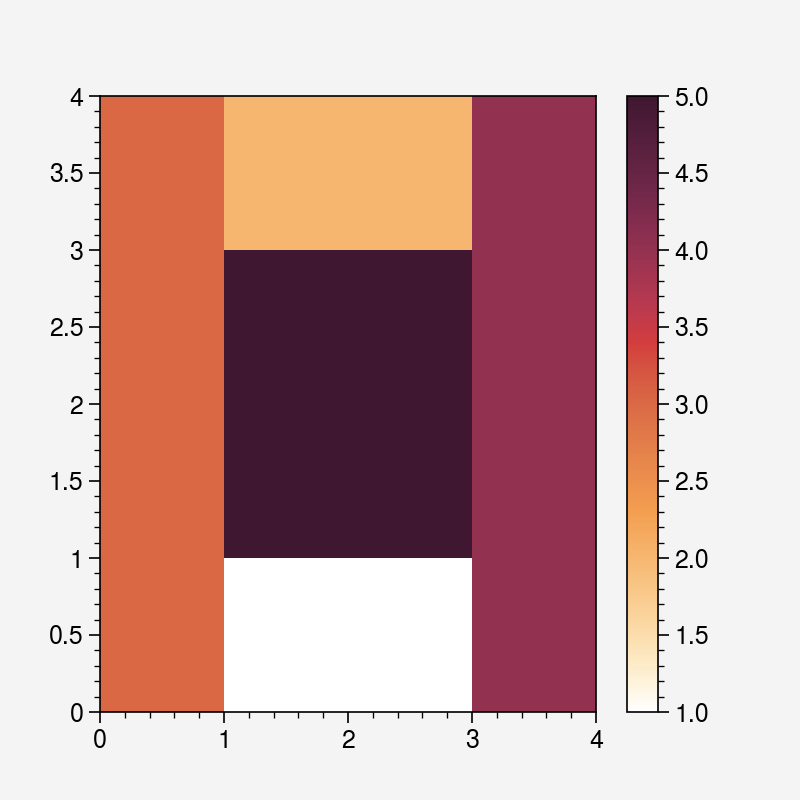

In [58]:
plt.pcolormesh(X[0,:,:,0])
plt.colorbar()

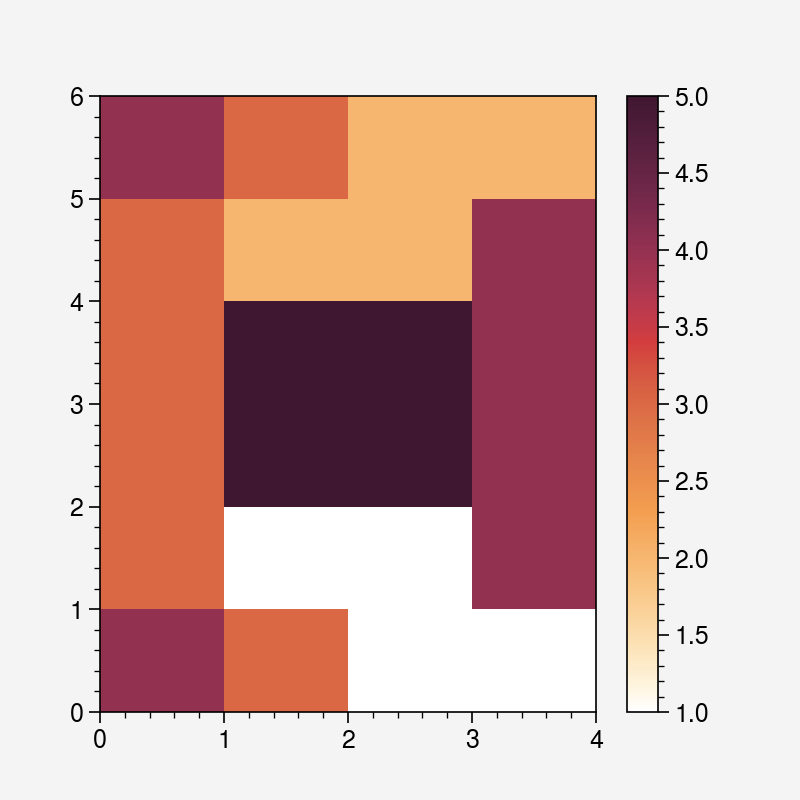

In [59]:
plt.pcolormesh(X_lat[0,:,:,0])
plt.colorbar()

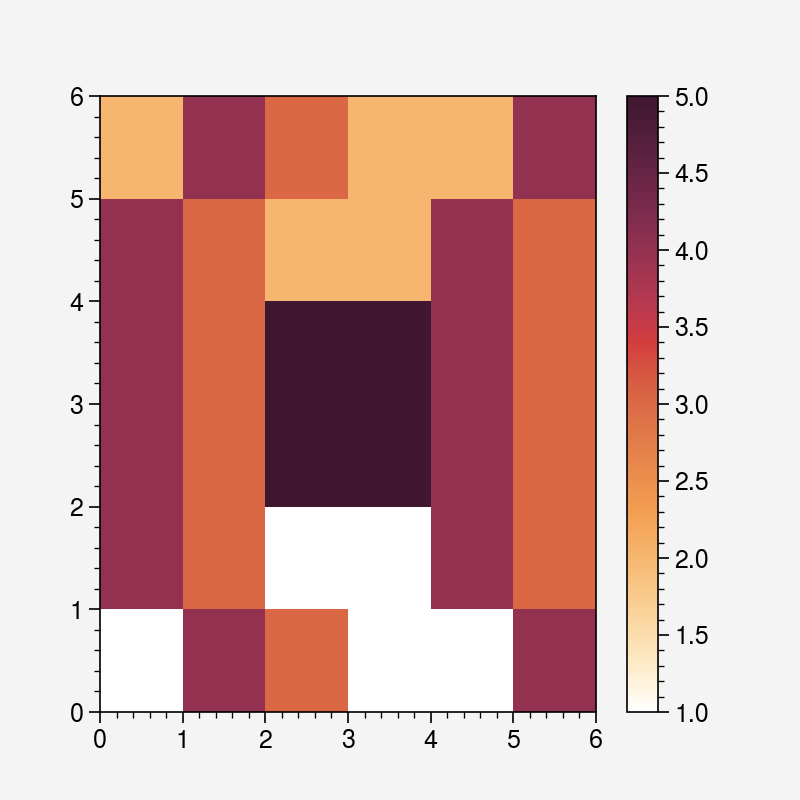

In [61]:
plt.pcolormesh(X_pad[0,:,:,0])
plt.colorbar()